### Data Cleaning

In [14]:
from sqlalchemy import create_engine
import pandas as pd
import re
from functools import reduce

def get_info():
    sqlitedb_path = '/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw_data_project_m1.db'
    engine = create_engine(f'sqlite:///{sqlitedb_path}')
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", engine)
    tables_lst = tables['name'].to_list()
    x = [pd.read_sql_query(f'select * from {i}', engine) for i in tables_lst]
    df_final = reduce(lambda left,right: pd.merge(left,right,on='uuid'), x)
    df_final.to_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/data_base_2.csv')
    jobs_ids = list(df_final['normalized_job_code'].unique())
    return jobs_ids

In [15]:
get_info()



([None,
  '861a9b9151e11362eb3c77ca914172d0',
  '049a3f3a2b5f85cb2971ba77ad66e10c',
  'f4b2fb1aa40f661488e2782b6d57ad2f',
  '27af8700f5577cec835acee2cb90a2ff',
  'c1b670eba9ccb65e7c99f7da116d5b9c',
  'd71c4164c99a5f9bca773e755a72f40f',
  '2ee80cf30e2483dfe0947adc0428f8c5',
  '897ef18a9321616495831a4b4b0c1bb2',
  'a003702c0cea282e17967772dd83de5e',
  '04c82eae29e1c4a30eac0710b74ab276',
  'fcaf4aac737e53ad24b9f32f08b8740f',
  '3833bd699e7afe4665b595f282da0387',
  '19e384e977796c25780d8c28b12089c4',
  '474b962c13632a04e42a546be4f11dbb',
  'dac2e921c1f887d9efc4c06fa33c1397',
  '996da29c84f5eed00da40c230f4c4078',
  'cc2b26cc436bea36bda3bdd7367c411a',
  '25fe195cbf915c0824fa6c44e6d0008c',
  '76385cb24e831b3364279b9de5641d8f',
  '16b67d7f57698455aefbc1ae1b358b50',
  'b24ece3300d2f8ab34f9553e531183d6',
  '5db2c8d6539f983e1ca3d7c5b939e190',
  '36675c937946c8a4fc5de7d0b4c850de',
  '847165cfda6b1dc82ae22b967da8af2f',
  '2ca138b991c50dc6696238e5ad800142',
  '775190277a849cba701b306a7b374c0a',
  '0

In [177]:
# to drop na jobs
#def drop_na_jobs():
#    get_info = pd.read_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/data_base.csv')
#    col_to_clean = 'normalized_job_code'
#    df_clean = get_info[get_info[col_to_clean].notna()]
#    return df_clean


In [185]:
#x = drop_na_jobs()
#x

In [182]:
#x = pd.unique(x['normalized_job_code'].to_list())
#j = [i for i in x]
#l = pd.DataFrame(j)
#l.to_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/jobs_ids.csv')

In [67]:
#df_career['normalized_job_code'].to_list()

### TO CLEAN

To change:
    1. age 
    2. gender
    3. age_group (!)
    

In [20]:
from sqlalchemy import create_engine
import pandas as pd
import re
from functools import reduce
def get_all_data():
    df = pd.read_csv('/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/all_data_merged.csv')
    return df

In [21]:
df = get_all_data()
df

,uuid,age,gender,dem_has_children,age_group,country_code,rural,dem_education_level,dem_full_time_job,normalized_job_code,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,English short name (using title case),title,normalized_job_title,parent_uuid
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61 years old,male,NO,40_65,AT,countryside,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,Austria,NaN,NaN,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57 years old,male,yES,40_65,AT,urban,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,Austria,Automatic Data Processing Planner,automatic data processing planner,0148f61d4227497728ce33490843d056
2,83127080-da3d-0133-c74f-0a81e8b09a82,32 years old,male,nO,26_39,AT,city,NaN,no,NaN,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,Austria,NaN,NaN,NaN
3,15626d40-db13-0133-ea5c-0a81e8b09a82,45 years old,Male,YES,40_65,AT,Country,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,Austria,Data Coordinator,data coordinator,0b9dd32a367f4562ec77b993053d1910
4,24954a70-db98-0133-4a64-0a81e8b09a82,41 years old,Fem,yES,40_65,AT,city,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,Austria,Database Developer,database developer,b90ca4df5690002377a7b0f1f3d40781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37 years old,FeMale,nO,26_39,SK,urban,high,yes,847165cfda6b1dc82ae22b967da8af2f,I understand it fully,I would probably vote for it,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,Slovakia,Data Warehouse Developer,data warehouse developer,72ac7ec4ef0212a3aa54ed92abac8a92
9645,39f989f0-db52-0133-8482-0a81e8b09a82,53 years old,Male,yES,40_65,SK,urban,high,yes,a4d5b8b38f9513825d0d94a981ebe962,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,Slovakia,Database Manager,database manager,b90ca4df5690002377a7b0f1f3d40781
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,1992,male,NO,juvenile,SK,Non-Rural,low,no,NaN,I have heard just a little about it,I would not vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above,Slovakia,NaN,NaN,NaN
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,47 years old,male,yES,40_65,SK,city,low,yes,775190277a849cba701b306a7b374c0a,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,Slovakia,Data Officer,data officer,596226d5f9ef63de41a852826d483d19


In [27]:
def clean_data(df):
    #print('Cleaning the merged dataframe')
    # cleaning the age column
    df['age'] = df['age'].apply(lambda age: re.sub('[a-z]', '', age))
    df = df.astype({'age': int})
    df['age'] = df['age'].apply(lambda age: age if age < 250 else 2016 - age)
    df['age_group'] = df['age_group'].apply(lambda group: group if group != 'juvenile' else '14_25')

    # cleaning the gender column
    df['gender'] = df['gender'].str.lower()
    df['gender'] = df['gender'].str.replace(r'\b[f]\w+', 'female')
    df['gender'] = df['gender'].str.replace(r'\b[m]\w+', 'male')

    # cleaning the dem_has_children column
    df['dem_has_children'] = df['dem_has_children'].str.lower()
    df['dem_has_children'] = df['dem_has_children'].str.replace(r'\b[y]\w+', 'yes')
    df['dem_has_children'] = df['dem_has_children'].str.replace(r'\b[m]\w+', 'no')

    # cleaning the rural column
    df['rural'] = df['rural'].str.lower()
    df['rural'] = df['rural'].str.replace(r'\b[ci]\w+', 'urban').replace(r'\b[count]\w+', 'no').replace('non-rural', 'rural')

    #print('Cleaning finished')
    return df

In [52]:
df_1 = clean_data(df)
x = df_1.groupby(['country_code', 'English short name (using title case)']).count().reset_index()
x[['country_code', 'English short name (using title case)']]

,country_code,English short name (using title case)
0,AT,Austria
1,BE,Belgium
2,BG,Bulgaria
3,CY,Cyprus
4,CZ,Czechia
5,DE,Germany
6,DK,Denmark
7,EE,Estonia
8,ES,Spain
9,FI,Finland


In [40]:
def analysis_data(df_1, country):
    df = df_1[df_1['title'].notna()]
    df_2 = df[['English short name (using title case)', 'title', 'age_group', 'uuid']]
    df_3 = df_2[df_2['English short name (using title case)'] == f'{country}']
    #k = df_2.groupby(['English short name (using title case)', 'title','age_group']).size()
    return df_3


In [41]:
q = analysis_data(df_1,)
q

,English short name (using title case),title,age_group,uuid
1,Austria,Automatic Data Processing Planner,40_65,54f0f1c0-dda1-0133-a559-0a81e8b09a82
3,Austria,Data Coordinator,40_65,15626d40-db13-0133-ea5c-0a81e8b09a82
4,Austria,Database Developer,40_65,24954a70-db98-0133-4a64-0a81e8b09a82
5,Austria,Data Entry Specialist,26_39,28583060-dbe2-0133-ff9c-0a81e8b09a82
7,Austria,Database Architect,40_65,dd743bb0-d9a5-0133-53b2-0a81e8b09a82
...,...,...,...,...
127,Austria,Electronic Data Processing Auditor (EDP Auditor),26_39,f8f95970-da28-0133-75d2-0a81e8b09a82
128,Austria,Database Coordinator,40_65,f8fca690-de54-0133-23b6-0a81e8b09a82
129,Austria,Databases Computer Consultant,26_39,a96ac600-da2f-0133-a7cd-0a81e8b09a82
131,Austria,Data Management Associate,40_65,5586f290-d972-0133-f6e5-0a81e8b09a82


In [ ]:
#x.to_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/processed/data_base_2.csv')
x
df[(df.A == 1) & (df.D == 6)]

x = df_h.groupby([ 'Country', 'Job Title','age_group'])['age_group'].count().reset_index(name='Quantity')

df[df['EPS'].notna()]

#df.groupby(['Age (years old)', 'Country', 'Job Title'])['Age (years old)'].count().reset_index(name="count")

In [244]:
#primero filttramos el dataframe df[['d','d','fg','etc']]

#el join cuando comparten indice ya no hace falta poner on
#pd.merge(1, 2, on=ccc)
#filtrar lo maximo posible antes de hacer cualqueir ope

### BONUS

In [243]:
a = df_1['question_bbi_2016wave4_basicincome_argumentsfor'].to_list()
all_r = []
for i in a:
    all_r.append(i.split("|"))
    

flat_list = [item.strip() for sublist in all_r for item in sublist]

set(flat_list)

{'It creates more equality of opportunity',
 'It encourages financial independence and self-responsibility',
 'It increases appreciation for household work and volunteering',
 'It increases solidarity, because it is funded by everyone',
 'It reduces anxiety about financing basic needs',
 'It reduces bureaucracy and administrative expenses',
 'None of the above'}

In [241]:
a = df_1['question_bbi_2016wave4_basicincome_argumentsagainst'].to_list()
all_r = []
for i in a:
    all_r.append(i.split("|"))
    

flat_list = [item.strip() for sublist in all_r for item in sublist]

set(flat_list)

{'Foreigners might come to my country and take advantage of the benefit',
 'It increases dependence on the state',
 'It is against the principle of linking merit and reward',
 'It is impossible to finance',
 'It might encourage people to stop working',
 'None of the above',
 'Only the people who need it most should get something from the state'}

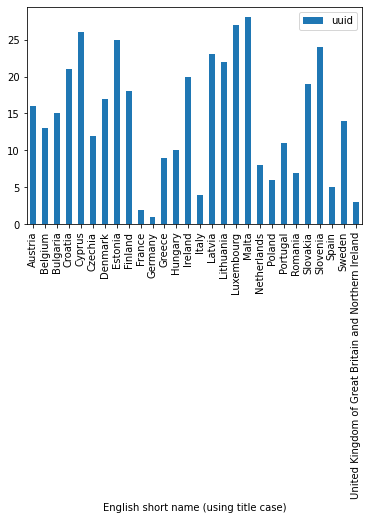

In [275]:
x = df_1.groupby(['English short name (using title case)'])['uuid'].size().rank(ascending=False).reset_index()
j = pd.DataFrame(x)
j.plot.bar(x='English short name (using title case)')

In [250]:
import matplotlib

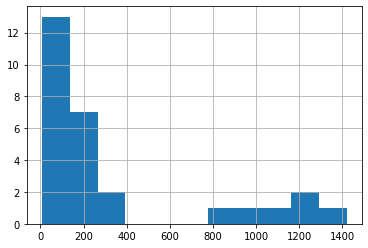

In [263]:
x.hist(bins=11)